In [1]:
import numpy as np
from model import Model
import torch
from torch.utils.data import DataLoader
from celeba_dataset import CelebaDataset, IMG_SHAPE, data_transforms

import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '../data'
MODEL_PATH = '../models/attempt7/epoch10'
ANNOTATION_DATA_PATH = f'{DATA_DIR}/list_attr_celeba.csv'
DATA_PATH = f'{DATA_DIR}/img_align_celeba'


In [3]:
dataset = CelebaDataset(ANNOTATION_DATA_PATH, DATA_PATH, transform=data_transforms)
all_labels = np.array(list(dataset.labels))

VAE_PARAMS = {
    'latent_dim_size': 8,
    'data_shape': IMG_SHAPE,
    'label_shape': len(dataset.labels)
}

In [4]:
m = Model.load(MODEL_PATH)
#m = torch.load(MODEL_PATH, map_location=torch.device('cpu'))
#m = Model(VAE_PARAMS)

Model parameters: 1981148


In [5]:
def reconstruction(dataset, example_count=8):
    dataloader = DataLoader(dataset, example_count, shuffle=True)
    data_x, data_y = next(iter(dataloader))
    decoded = m.transform(data_x, data_y).detach().numpy()
    print(decoded.shape)
    print(all_labels)
    fig, ax = plt.subplots(example_count, 2, figsize=(10, 10))
    for i in range(example_count):
        pic, labels = data_x[i], data_y[i]
        l_i = list(map(lambda z: bool(z), labels.numpy()))
        labels_txt = ', '.join(all_labels[l_i])
        ax[i, 0].imshow(np.moveaxis(np.array(pic), 0, -1))
        ax[i, 0].set_title(labels_txt)
        ax[i, 0].axis('off')
        print(pic)
        print(decoded[i])
        ax[i, 1].imshow(np.moveaxis(decoded[i], 0, -1))
        #ax[i, 1].set_title(labels_txt)
        ax[i, 1].axis('off')
    plt.show()

/Users/valeriamozarova/opt/anaconda3/envs/face_creation/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clippin

(5, 3, 224, 184)
['5_o_Clock_Shadow' 'Arched_Eyebrows' 'Attractive' 'Bags_Under_Eyes'
 'Bald' 'Bangs' 'Big_Lips' 'Big_Nose' 'Black_Hair' 'Blond_Hair' 'Blurry'
 'Brown_Hair' 'Bushy_Eyebrows' 'Chubby' 'Double_Chin' 'Eyeglasses'
 'Goatee' 'Gray_Hair' 'Heavy_Makeup' 'High_Cheekbones' 'Male'
 'Mouth_Slightly_Open' 'Mustache' 'Narrow_Eyes' 'No_Beard' 'Oval_Face'
 'Pale_Skin' 'Pointy_Nose' 'Receding_Hairline' 'Rosy_Cheeks' 'Sideburns'
 'Smiling' 'Straight_Hair' 'Wavy_Hair' 'Wearing_Earrings' 'Wearing_Hat'
 'Wearing_Lipstick' 'Wearing_Necklace' 'Wearing_Necktie' 'Young']
tensor([[[1.7694, 1.7694, 1.7694,  ..., 1.8893, 1.8893, 1.8893],
         [1.7694, 1.7694, 1.7694,  ..., 1.8893, 1.8893, 1.8893],
         [1.7694, 1.7694, 1.7694,  ..., 1.8893, 1.8893, 1.8893],
         ...,
         [1.1700, 1.1700, 1.1700,  ..., 1.1529, 1.1529, 1.1529],
         [1.1700, 1.1700, 1.1700,  ..., 1.1529, 1.1529, 1.1529],
         [1.1700, 1.1700, 1.1700,  ..., 1.1529, 1.1529, 1.1529]],

        [[2.0434, 2.0434

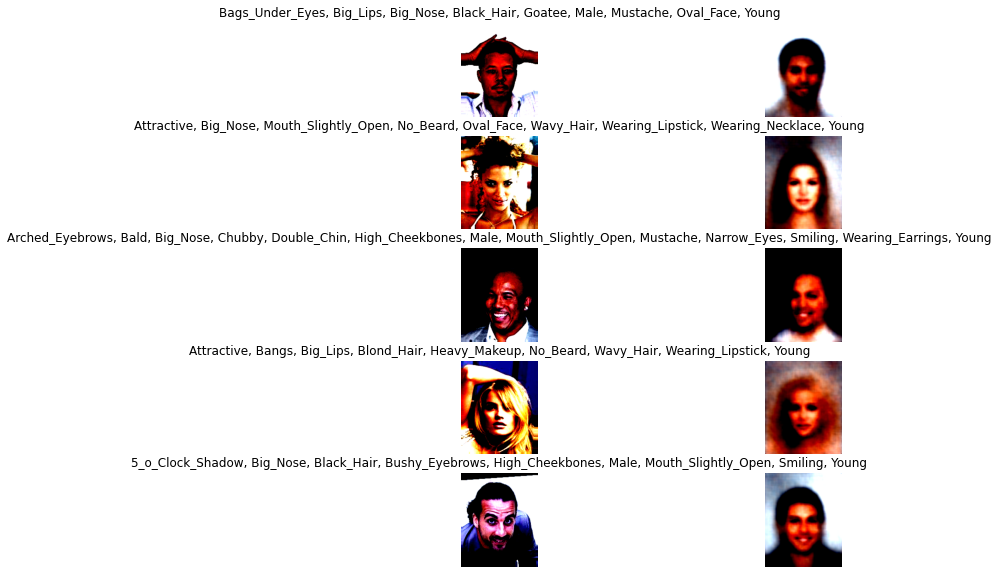

In [6]:
reconstruction(dataset, 5)

In [7]:
def creation(labels):
    labels_encoded = [[1 if l in labels else 0 for l in all_labels]]
    generated = m.generate_random_with_label(labels_encoded).detach().numpy()[0]
    print(generated)
    plt.imshow(np.moveaxis(generated, 0, -1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-2.05488324e-01 -2.05488324e-01 -1.59363240e-01 ...  9.94175673e-04
   -8.24943185e-03 -8.24943185e-03]
  [-2.05488324e-01 -2.05488324e-01 -1.59363240e-01 ...  9.94175673e-04
   -8.24943185e-03 -8.24943185e-03]
  [-2.12368816e-01 -2.12368816e-01 -1.83658078e-01 ... -3.10471356e-02
   -1.39506459e-02 -1.39506459e-02]
  ...
  [-1.84559286e-01 -1.84559286e-01 -1.81581616e-01 ... -8.83454442e-01
   -8.55040908e-01 -8.55040908e-01]
  [-1.92461148e-01 -1.92461148e-01 -1.60217658e-01 ... -9.18180764e-01
   -7.86900580e-01 -7.86900580e-01]
  [-1.92461148e-01 -1.92461148e-01 -1.60217658e-01 ... -9.18180764e-01
   -7.86900580e-01 -7.86900580e-01]]

 [[-2.38466054e-01 -2.38466054e-01 -1.82294339e-01 ... -1.10201240e-02
   -7.03898370e-02 -7.03898370e-02]
  [-2.38466054e-01 -2.38466054e-01 -1.82294339e-01 ... -1.10201240e-02
   -7.03898370e-02 -7.03898370e-02]
  [-2.48946339e-01 -2.48946339e-01 -2.21475810e-01 ... -6.83599412e-02
   -9.14001763e-02 -9.14001763e-02]
  ...
  [-3.41770589e-01 -3.4

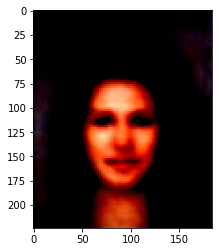

In [9]:
creation([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.01868871 -0.01868871  0.03250113 ...  0.23751652  0.20906085
    0.20906085]
  [-0.01868871 -0.01868871  0.03250113 ...  0.23751652  0.20906085
    0.20906085]
  [-0.00922152 -0.00922152  0.00216106 ...  0.23294157  0.23682112
    0.23682112]
  ...
  [ 0.02855957  0.02855957  0.04563645 ... -0.9112241  -0.8616246
   -0.8616246 ]
  [ 0.00976911  0.00976911  0.07253522 ... -0.9299509  -0.7863983
   -0.7863983 ]
  [ 0.00976911  0.00976911  0.07253522 ... -0.9299509  -0.7863983
   -0.7863983 ]]

 [[-0.02952069 -0.02952069  0.03992486 ...  0.2653045   0.17730194
    0.17730194]
  [-0.02952069 -0.02952069  0.03992486 ...  0.2653045   0.17730194
    0.17730194]
  [-0.01458466 -0.01458466 -0.00127023 ...  0.23308921  0.19103783
    0.19103783]
  ...
  [-0.12469128 -0.12469128 -0.14325568 ... -1.0255823  -0.9892261
   -0.9892261 ]
  [-0.16354114 -0.16354114 -0.13962227 ... -1.034573   -0.9230406
   -0.9230406 ]
  [-0.16354114 -0.16354114 -0.13962227 ... -1.034573   -0.9230406
   -0.923040

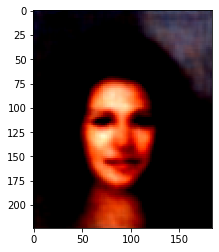

In [20]:
creation(['Arched_Eyebrows'])